<a href="https://colab.research.google.com/github/trangmoon309/datascience-thpt2020/blob/master/KHDL_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [217]:
with open('diemthi2020.csv', encoding ='utf-8') as file:
    data = file.read().split('\n')

students = data[1:]

# xóa học sinh rỗng (ở cuối danh sách)
students.pop()
students.pop(0)
total_student = len(students)
print(total_student)

1002


In [218]:
arr_x = []
arr_item_x = []

arr_y = []

# split each student 
# tất cả: 15 cột
# Toán: cột 5
# các điểm trừ môn Toán: 9 cột (từ 6 - 14)

for i in range(len(students)):
    students[i] = students[i].split(",")
    for j in range(len(students[i])):
      if j >= 6:
        arr_item_x.append(students[i][j])
      if j==5:
        arr_y.append(students[i][j])

    arr_x.append(arr_item_x)
    arr_item_x = []
print(arr_x[0])
X_input = np.asfarray(arr_x)
X_column = X_input.shape[1]
X_row = X_input.shape[0]

Y_output = np.asfarray(arr_y)

print("Total data:" len(arr_x))
print("Input shape: " + str(X_input.shape))
print("Output shape: " + str(Y_output.shape))


['6.25', '6.67', '0', '5.75', '0', '7.25', '0', '0', '0', '5.2']
1002
Input shape: (1002, 10)
Output shape: (1002,)


In [245]:
from sklearn.model_selection import train_test_split

# data_reshaped = X_input.reshape(X_row,X_column,1)
# X_train,X_val_test,Y_train,Y_val_test = train_test_split(data_reshaped,Y_output,test_size=0.2)
# X_test,X_validation,Y_test,Y_validation = train_test_split(X_val_test,Y_val_test,test_size=0.5)

data_reshaped = X_input.reshape(X_row,X_column,1)
X_train,X_val_test,Y_train,Y_val_test = train_test_split(data_reshaped,Y_output,test_size=0.2)
X_test,X_validation,Y_test,Y_validation = train_test_split(X_val_test,Y_val_test,test_size=0.5)

print(X_train.shape)
print(X_test.shape)

(801, 10, 1)
(100, 10, 1)


In [135]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dropout,LSTM
from tensorflow.keras.layers import MaxPooling1D

In [273]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.optimizers import RMSprop
from keras.callbacks import Callback

def simple_rnn():
    model = Sequential()
    model.add(SimpleRNN(units=128, input_shape=(10,1), activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    return model
model_rnn = simple_rnn()
model_rnn.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_18 (SimpleRNN)    (None, 128)               16640     
_________________________________________________________________
dense_130 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_131 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_132 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_133 (Dense)            (None, 1)                 17        
Total params: 27,521
Trainable params: 27,521
Non-trainable params: 0
_________________________________________________________________


In [274]:
batch_size=10
num_epochs = 100
history=model_rnn.fit(X_train,Y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test,Y_test))

Epoch 1/100
81/81 [==============================] - 3s 11ms/step - loss: 21.5296 - val_loss: 0.6118
Epoch 2/100
81/81 [==============================] - 0s 4ms/step - loss: 0.7476 - val_loss: 0.5647
Epoch 3/100
81/81 [==============================] - 0s 4ms/step - loss: 1.0405 - val_loss: 0.6105
Epoch 4/100
81/81 [==============================] - 0s 4ms/step - loss: 0.9247 - val_loss: 0.7792
Epoch 5/100
81/81 [==============================] - 0s 4ms/step - loss: 0.8962 - val_loss: 0.5914
Epoch 6/100
81/81 [==============================] - 0s 4ms/step - loss: 1.0276 - val_loss: 0.6784
Epoch 7/100
81/81 [==============================] - 0s 5ms/step - loss: 1.0941 - val_loss: 0.7901
Epoch 8/100
81/81 [==============================] - 0s 4ms/step - loss: 1.0223 - val_loss: 0.6238
Epoch 9/100
81/81 [==============================] - 0s 4ms/step - loss: 0.8144 - val_loss: 0.8880
Epoch 10/100
81/81 [==============================] - 0s 4ms/step - loss: 1.0413 - val_loss: 0.5066
Epoch 1

dict_keys(['loss', 'val_loss'])


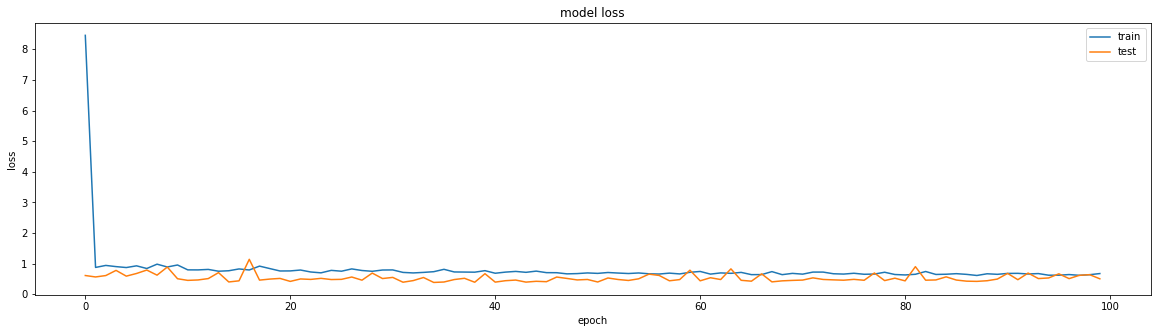

In [275]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.figure(figsize=(20,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

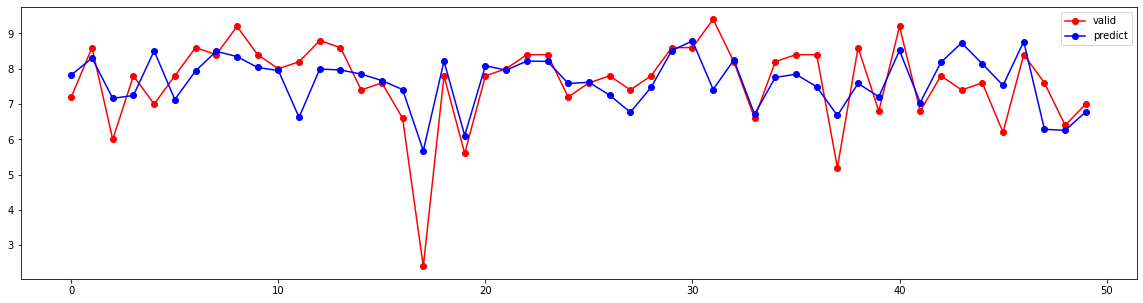

In [299]:
predict_RNN= model_rnn.predict(X_validation)
plt.figure(figsize=(20,5))
plt.plot(Y_validation[0:50],'ro-')
plt.plot(predict_RNN[0:50],'bo-')
plt.legend(['valid', 'predict'], loc='upper right')
plt.show()

In [309]:
from keras.layers import Dropout

def lstm_rnn():
  # Initialising the RNN
  model = Sequential()

  model.add(LSTM(units=128, input_shape=(10,1), activation="relu"))
  model.add(Dense(100, activation="relu"))
  model.add(Dense(units = 1))
  model.compile(optimizer = 'adam', loss = 'mse')

  return model
model_lstm = lstm_rnn()
#model_lstm.summary()

In [310]:
#compile and fit the model on 30 epochs
history=model_lstm.fit(X_train,Y_train, epochs=100, batch_size=10, validation_data=(X_test,Y_test))

Epoch 1/100
81/81 [==============================] - 3s 14ms/step - loss: 21.6375 - val_loss: 1.2141
Epoch 2/100
81/81 [==============================] - 1s 11ms/step - loss: 1.3839 - val_loss: 0.8645
Epoch 3/100
81/81 [==============================] - 1s 10ms/step - loss: 1.2896 - val_loss: 0.6684
Epoch 4/100
81/81 [==============================] - 1s 10ms/step - loss: 0.8199 - val_loss: 0.7735
Epoch 5/100
81/81 [==============================] - 1s 11ms/step - loss: 0.8560 - val_loss: 0.5132
Epoch 6/100
81/81 [==============================] - 1s 11ms/step - loss: 0.8972 - val_loss: 0.6302
Epoch 7/100
81/81 [==============================] - 1s 10ms/step - loss: 0.7503 - val_loss: 0.4643
Epoch 8/100
81/81 [==============================] - 1s 10ms/step - loss: 0.8473 - val_loss: 0.9230
Epoch 9/100
81/81 [==============================] - 1s 11ms/step - loss: 0.7255 - val_loss: 0.5165
Epoch 10/100
81/81 [==============================] - 1s 10ms/step - loss: 0.7780 - val_loss: 0.498

dict_keys(['loss', 'val_loss'])


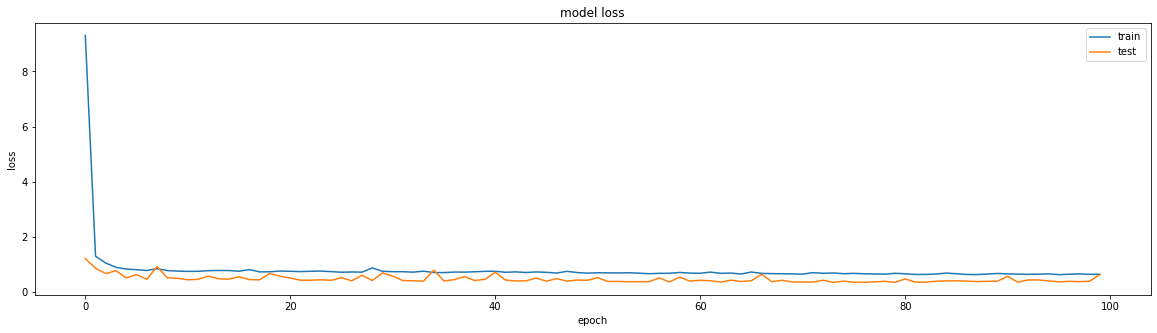

In [311]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.figure(figsize=(20,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

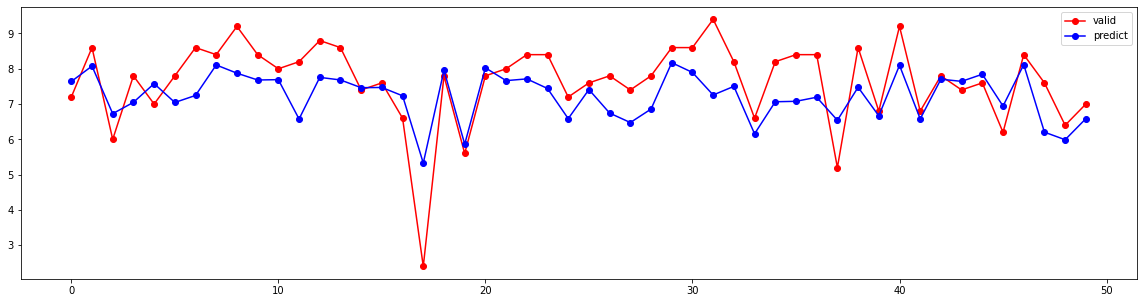

In [313]:
predict_LSTM= model_lstm.predict(X_validation)
plt.figure(figsize=(20,5))
plt.plot(Y_validation[0:50],'ro-')
plt.plot(predict_LSTM[0:50],'bo-')
plt.legend(['valid', 'predict'], loc='upper right')
plt.show()